### Submitted By- UP2280648

### Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
pip install nltk


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Reading the file with tab as delimiter
reviews = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Product_Review', 'Label'])

reviews.head()

,Product_Review,Label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [ ]:
reviews.shape

(1000, 2)

In [ ]:
reviews.dtypes

,0
Product_Review,object
Label,int64


In [ ]:
reviews = reviews.astype({'Product_Review': 'string'})

In [ ]:
reviews.dtypes

,0
Product_Review,string[python]
Label,int64


In [ ]:
# Copy of the original dataset
preprocessed_reviews = reviews.copy()
preprocessed_reviews.head()


,Product_Review,Label
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


# Task 1 (Text Preprocessing)

### 1. Removing Punctuation

In [ ]:
preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].str.translate(str.maketrans('', '', string.punctuation))


Example 1

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[1]['Product_Review']
print(review)

Good case, Excellent value.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[1]['Product_Review']
print(review)

Good case Excellent value


Example 2

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[18]['Product_Review']
print(review)

Works great!.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[18]['Product_Review']
print(review)

Works great


Example 3

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[46]['Product_Review']
print(review)

Who in their right mind is gonna buy this battery?.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[46]['Product_Review']
print(review)

Who in their right mind is gonna buy this battery


### 2. Removing Numbers

In [ ]:
preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].str.translate(str.maketrans('', '', string.digits))


Example 1

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[26]['Product_Review']
print(review)

I've owned this phone for 7 months now and can say that it's the best mobile phone I've had.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[26]['Product_Review']
print(review)

Ive owned this phone for  months now and can say that its the best mobile phone Ive had


Example 2

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[40]['Product_Review']
print(review)

It has a great camera thats 2MP, and the pics are nice and clear with great picture quality.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[40]['Product_Review']
print(review)

It has a great camera thats MP and the pics are nice and clear with great picture quality


Example 3

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[3]['Product_Review']
print(review)

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[3]['Product_Review']
print(review)

Tied to charger for conversations lasting more than  minutesMAJOR PROBLEMS


### 3. Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].apply(
    lambda x: ' '.join(term for term in x.split() if term not in stop_words))
preprocessed_reviews.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Product_Review,Label
0,So way plug US unless I go converter,0
1,Good case Excellent value,1
2,Great jawbone,1
3,Tied charger conversations lasting minutesMAJOR PROBLEMS,0
4,The mic great,1


Example 1

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[10]['Product_Review']
print(review)

And the sound quality is great.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[10]['Product_Review']
print(review)

And sound quality great


Example 2

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[30]['Product_Review']
print(review)

This is a simple little phone to use, but the breakage is unacceptible.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[30]['Product_Review']
print(review)

This simple little phone use breakage unacceptible


Example 3

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[991]['Product_Review']
print(review)

Painful on the ear.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[991]['Product_Review']
print(review)

Painful ear


### 4. Coverting the data into lowercase

In [ ]:
preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].str.lower()


Example 1

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[47]['Product_Review']
print(review)

AFTER ARGUING WITH VERIZON REGARDING THE DROPPED CALLS WE RETURNED THE PHONES AFTER TWO DAYS.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[47]['Product_Review']
print(review)

after arguing with verizon regarding the dropped calls we returned the phones after two days


Example 2

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[37]['Product_Review']
print(review)

Poor Talk Time Performance.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[37]['Product_Review']
print(review)

poor talk time performance


Example 3

In [ ]:
# Original Dataset ('reviews')
review =reviews.iloc[976]['Product_Review']
print(review)

SWEETEST PHONE!!!


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[976]['Product_Review']
print(review)

sweetest phone


### 5. Lemmatizing using POS tags

In [ ]:


# Importing spaCy
import spacy

# Loading the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Function to lemmatize the text using spaCy
def lemmatize_text(text):

    doc = nlp(text)

    return ' '.join([token.lemma_ for token in doc])

# Applying the lemmatization to each review in the 'Product_Review' column
preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].apply(lemmatize_text)

# Displaying the updated DataFrame with lemmatized reviews
print(preprocessed_reviews[['Product_Review']].head())


                                       Product_Review
0                so way plug we unless I go converter
1                           good case excellent value
2                                       great jawbone
3  tie charger conversation last minutesmajor problem
4                                       the mic great


Example 1

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[3]['Product_Review']
print(review)

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[3]['Product_Review']
print(review)

tie charger conversation last minutesmajor problem


Example 2

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[11]['Product_Review']
print(review)

He was very impressed when going from the original battery to the extended battery.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[11]['Product_Review']
print(review)

he impress go original battery extend battery


Example 3

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[992]['Product_Review']
print(review)

Lasted one day and then blew up.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[992]['Product_Review']
print(review)

last one day blow


### 6. Correcting the Spellings

In [ ]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.0 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()


preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].apply(
    lambda x: ' '.join([spell.correction(word) if spell.correction(word) is not None else word for word in x.split()])
)


Example 1

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[30]['Product_Review']
print(review)

This is a simple little phone to use, but the breakage is unacceptible.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[30]['Product_Review']
print(review)

this simple little phone use breakage unacceptable


Example 2

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[952]['Product_Review']
print(review)

Very satisifed with that.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[952]['Product_Review']
print(review)

very satisfied


Example 3

In [ ]:
# Original dataset ('reviews')
review =reviews.iloc[28]['Product_Review']
print(review)

People couldnt hear me talk and I had to pull out the earphone and talk on the phone.


In [ ]:
# Preprocessed dataset ('preprocessed_reviews')
review =preprocessed_reviews.iloc[28]['Product_Review']
print(review)

people could not hear talk I pull earphone talk phone


### Task 2 (Classification using Bag of Words Representation)

### Bag of Words Representation of the Preprocessed Text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()


cv_reviews = cv.fit_transform(preprocessed_reviews['Product_Review'])

# Getting the feature names (i.e., the words/tokens) from the CountVectorizer
feature_names = cv.get_feature_names_out()

# Converting the sparse matrix into a DataFrame
df = pd.DataFrame(cv_reviews.toarray(), columns=feature_names)

# Adding the 'Label' column from preprocessed_reviews DataFrame to the new DataFrame
df['label'] = preprocessed_reviews['Label']


df.head()


,abhor,ability,able,abound,abovepretty,absolutely,ac,accept,acceptable,access,...,wrongfirst,wrongly,year,yearsgreat,yell,yes,yet,you,zero,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,abhor,ability,able,abound,abovepretty,absolutely,ac,accept,acceptable,access,accessible,accessory,accessoryone,accidentally,accompanied,accord,activate,activesync,actually,ad,adapter,add,addition,additional,address,adhesive,adorable,advertise,advise,after,aggravating,ago,alarm,all,allot,allow,almost,alone,along,also,although,aluminum,always,am,amaze,amazed,amazing,amazon,amp,ample,amplified,an,and,angels,angle,another,answer,ant,antenna,antiglare,any,anyone,anything,anyway,anywhere,apart,apartment,apparently,appeal,appear,appearance,appointment,area,argue,armband,around,arrival,arrive,as,asia,ask,aspect,assume,at,attack,attractive,audio,authentic,auto,autoanswer,available,average,avoid,away,awesome,awful,awkward,back,background,backlight,bad,balance,bar,barely,bargain,basement,basic,basically,battery,be,beat,beautiful,because,bed,bee,beep,believe,bell,belt,bend,bethe,beware,big,bill,biopic,bit,black,blackberry,blacktop,bland,blow,blue,bluetooth,bluetoothmotorola,blunt,bmw,book,booking,boost,boot,bose,bother,bottom,bought,boy,brand,break,breakage,brilliant,broke,broken,browse,browser,bt,bubble,buck,bud,build,bulky,bumper,but,button,buy,buyer,buying,buzz,cable,calendar,call,camera,can,canal,cancel,cancellation,capability,capacity,car,card,care,careful,carrier,carry,case,cassette,cat,catch,catching,cause,cd,cell,cellphone,cellular,cent,center,certain,certainly,change,channel,charge,chargelife,charger,charm,cheap,cheaply,check,childlike,china,chinese,choice,christmas,cingularatt,clarity,classy,clear,clearly,clever,click,clip,clock,colleague,color,colored,combination,come,comfort,comfortable,comfortably,comment,commercial,communicate,communication,commuter,company,comparablyprice,compare,compete,competitor,complain,complaint,completely,compliment,compromise,computer,concrete,condition,confusing,connect,connected,connection,constantly,construct,construction,consumer,contact,continue,contract,control,convenient,conversation,converter,cool,cops,copy,cord,correctly,cost,could,counter,counterfeit,couple,coupon,course,cover,coverage,crack,cracked,cradle,crap,crappy,crash,crawl,creak,crisp,cumbersome,current,currently,curve,customer,cut,cute,cutout,damage,darn,date,datum,day,dead,deaf,deal,decade,decent,decision,defeat,defect,defective,definitely,delay,delivery,describe,description,design,despite,destination,destroy,detachable,detailed,development,device,dialing,die,different,difficult,dining,direct,direction,directly,dirty,disappoint,disappointed,disappointing,disappointment,discard,discomfort,disconnect,discount,disgusting,display,displeased,disposable,dissapointe,distorted,distract,dit,division,do,docking,dollar,double,down,download,downloading,dozen,drain,drawback,dreamworld,drive,driving,drop,dropping,druid,dualpurpose,due,durable,during,dustpan,dying,ear,earful,early,earned,earphone,earpiece,ease,easily,easy,echo,edge,effect,effective,effort,either,electronic,elegant,else,elsewhere,embarrassing,embed,encourage,end,engage,engineer,enid,enjoy,enough,enter,entertainment,entire,equipment,era,ergonomic,ericson,ericsson,especially,essentially,et,europe,even,eventually,ever,every,everyday,everyone,everything,everywhere,ex,exactly,exceed,excel,excellent,except,exceptional,excessive,exchange,excite,exclaim,excruciatingly,exercise,exist,expect,expectation,expensive,experience,explain,extend,exterior,external,extra,extremely,eye,fabulous,face,faceplate,fact,factor,fail,fairly,fall,family,fantastic,far,fast,father,favorite,feature,fee,feel,figure,file,finally,find,fine,finger,finish,fire,firefly,first,firstperson,fit,five,fix,flash,flaw,flawed,flawless,flawlessly,flimsy,flip,flipphone,floor,flop,floppy,flush,fm,follow,fond,fool,foot,for,force,forever,forgery,forget,forgot,form,four,fourth,fraction,free,freedom,freeway,freeze,frequently,friend,friendly,frog,from,front,frustration,fry,fulfill,full,fully,fun,function,functional,functionality,funny,gadget,game,garbage,garbled,geeky,gel,generally,gentletouch,genuine,get,getting,gimmick,girl,give,gl

In [ ]:
df.shape

(1000, 1439)

In [ ]:
X = df.drop(columns=['label'])  # Features
y = df['label'].values # target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
# Converting X_train, X_test, and y_train to numpy arrays directly
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()  # Flattening y_train to a 1D array

### Random Forest Classifier: Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# parameters grid for GridSearchCV
parameters = {
'n_estimators': [100, 200, 300],
'max_depth': [10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'criterion':['gini','entropy','log_loss'],
'max_features': ['sqrt', 'log2']
}

# Initializing the RandomForestClassifier
RF = RandomForestClassifier(random_state=0)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=RF, param_grid=parameters,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Predicting using the best model from GridSearchCV
best_RF = grid_search.best_estimator_
y_pred = best_RF.predict(X_test)

# Performance metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Getting predicted probabilities for the positive class
y_proba = best_RF.predict_proba(X_test)[:, 1]

# AUC calculation using predicted probabilities
print("AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
 [[ 99  21]
 [ 22 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       120
           1       0.84      0.83      0.83       130

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

Accuracy: 0.828
AUC: 0.9008012820512821


### ROC Curve

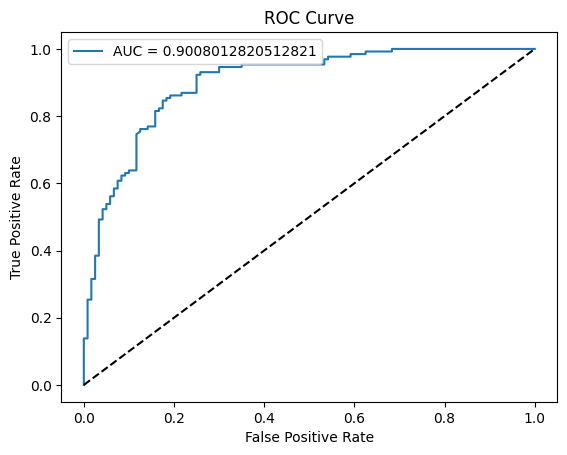

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = best_RF.predict_proba(X_test)[:, 1]

# Computing FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Bagging Classifier: Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Parameters grid for GridSearchCV
parameters = {
    'n_estimators': [50, 100, 150],  # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],  # Proportion of samples for training each base estimator
    'max_features': [0.5, 0.7, 1.0],  # Proportion of features for training each base estimator
    'bootstrap': [True, False],  # Whether samples are drawn with replacement
    'bootstrap_features': [True, False]  # Whether features are drawn with replacement
}

# Initializing the BaggingClassifier
BC = BaggingClassifier(random_state=0)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=BC, param_grid=parameters,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Predicting using the best model from GridSearchCV
best_BC = grid_search.best_estimator_
y_pred = best_BC.predict(X_test)

# Performance metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Getting predicted probabilities for the positive class
y_proba = best_BC.predict_proba(X_test)[:, 1]

# AUC calculation using predicted probabilities
print("AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}

Confusion Matrix:
 [[103  17]
 [ 33  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80       120
           1       0.85      0.75      0.80       130

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.81      0.80      0.80       250

Accuracy: 0.8
AUC: 0.8735897435897436


### ROC Curve

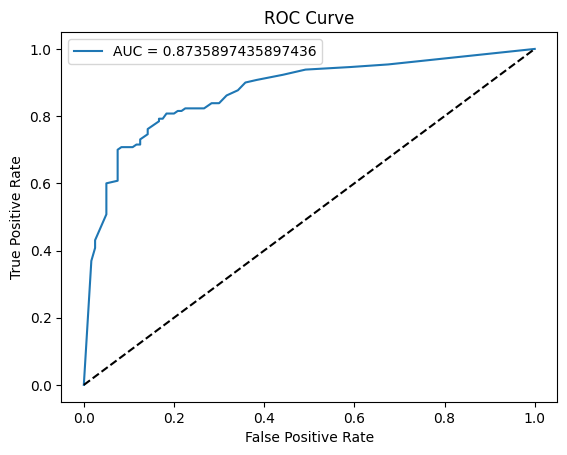

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = best_BC.predict_proba(X_test)[:, 1]

# Computing FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### KNN Classifier: Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Parameters grid for GridSearchCV
parameters = {
    'n_neighbors': [3, 4, 5, 6, 7],       # Number of neighbors to use
    'weights':['uniform','distance'],
    'p': [1, 2]                    # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initializing the KNeighborsClassifier
KNN = KNeighborsClassifier()

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=parameters,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Predicting using the best model from GridSearchCV
best_KNN = grid_search.best_estimator_
y_pred = best_KNN.predict(X_test)

# Performance metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Getting predicted probabilities for the positive class
y_proba = best_KNN.predict_proba(X_test)[:, 1]

# AUC calculation using predicted probabilities
print("AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

Confusion Matrix:
 [[ 78  42]
 [ 15 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.73       120
           1       0.73      0.88      0.80       130

    accuracy                           0.77       250
   macro avg       0.79      0.77      0.77       250
weighted avg       0.78      0.77      0.77       250

Accuracy: 0.772
AUC: 0.8556410256410256


### ROC Curve

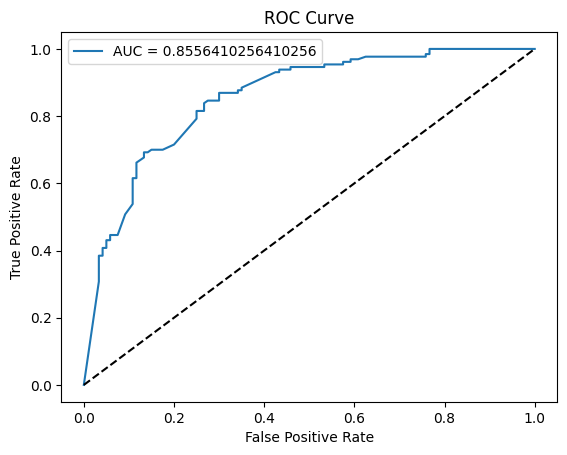

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = best_KNN.predict_proba(X_test)[:, 1]

# Computing FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### AdaBoost Classifier: Hyperparameter Tuning and Model Evaluation

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Parameters grid for GridSearchCV
parameters = {
    'n_estimators': [100, 150,200,250],  # Number of boosting rounds
    'learning_rate': [0.001,0.01, 0.1, 1.0,2.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting algorithms
}

# Initializing the AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=0)

# Initializing GridSearchCV
grid_search = GridSearchCV(estimator=ABC, param_grid=parameters,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Performing the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Predicting using the best model from GridSearchCV
best_ABC = grid_search.best_estimator_
y_pred = best_ABC.predict(X_test)

# Performance metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Getting predicted probabilities for the positive class
y_proba = best_ABC.predict_proba(X_test)[:, 1]

# AUC calculation using predicted probabilities
print("AUC:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}

Confusion Matrix:
 [[106  14]
 [ 44  86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.79       120
           1       0.86      0.66      0.75       130

    accuracy                           0.77       250
   macro avg       0.78      0.77      0.77       250
weighted avg       0.79      0.77      0.77       250

Accuracy: 0.768
AUC: 0.8581730769230769


### ROC Curve

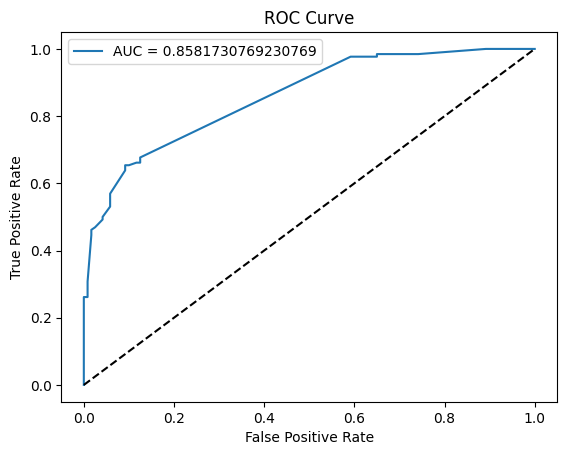

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = best_ABC.predict_proba(X_test)[:, 1]

# Computing FPR, TPR, and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Comparision of Classification Models used

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


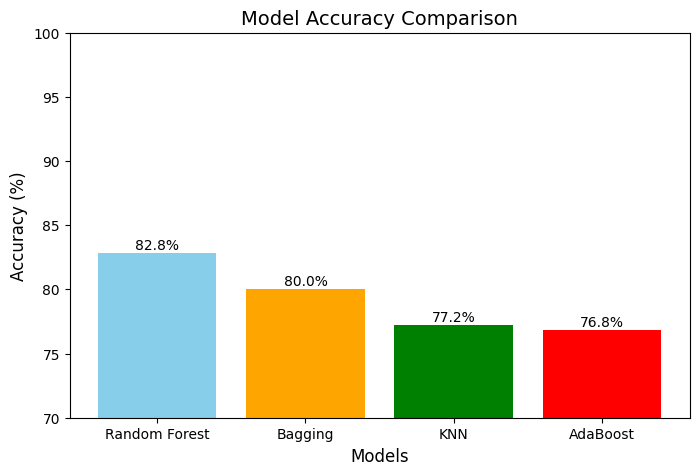

In [ ]:
import matplotlib.pyplot as plt

# Data for the chart
models = ['Random Forest', 'Bagging', 'KNN', 'AdaBoost']
accuracies = [82.8, 80.0, 77.2, 76.8]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'red'])

# Adding title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Adding the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.3, f'{accuracy}%', ha='center', fontsize=10)

# Setting the y-axis range from 70 to 100
plt.ylim(70, 100)

# Display the chart
plt.show()


### Task 3(Classification using BERT and Roberta Model)

### BERT model

In [ ]:
pip install transformers datasets torch scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    preprocessed_reviews['Product_Review'], preprocessed_reviews['Label'], test_size=0.2, stratify=preprocessed_reviews['Label'])


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

train_encodings = encode_data(train_texts, tokenizer)
val_encodings = encode_data(val_texts, tokenizer)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Printing the keys of the tokenized data to understand the structure
print("Train Encodings Keys:", train_encodings.keys())
print("Validation Encodings Keys:", val_encodings.keys())

# Print a sample of the tokenized input (e.g., first example) from both training and validation sets
print("\nSample tokenized input (train):", train_encodings['input_ids'][0])
print("\nSample tokenized input (val):", val_encodings['input_ids'][0])

# Optionally, convert the token IDs back to text to see the tokenized sentences
decoded_train = tokenizer.decode(train_encodings['input_ids'][0], skip_special_tokens=True)
decoded_val = tokenizer.decode(val_encodings['input_ids'][0], skip_special_tokens=True)

print("\nDecoded sample input (train):", decoded_train)
print("\nDecoded sample input (val):", decoded_val)


Train Encodings Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])
Validation Encodings Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

Sample tokenized input (train): tensor([  101,  2021,  2553,  2204,  2112,  8816,  3861, 12191,  2224, 20868,
         2130,  4604,  3861, 12191,  3042,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0])

Sample tokenized input (val): tensor([  101,  2065, 15082,  3954, 29337,  2442,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

Decoded sample input (train): but case good part download picture laptop use ir even send picture laptop phone

Decoded sample input (val): if razor owneryou must


In [ ]:
import torch

class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

train_dataset = ReviewsDataset(train_encodings, train_labels)
val_dataset = ReviewsDataset(val_encodings, val_labels)


In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments
import os

os.environ["WANDB_DISABLED"] = "true"

# Specifying training arguments
training_args = TrainingArguments(
    output_dir='./results',
    run_name="bert_sentiment_analysis",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    save_total_limit=2
)

# Defining the Trainer
trainer = Trainer(
    model=model,                         # Pretrained BERT model for classification
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=val_dataset             # Validation dataset
)

# Training the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-71-74941cd70699>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.693300,0.674431
2,0.618200,0.470112
3,0.358100,0.409875


<ipython-input-71-74941cd70699>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-74941cd70699>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-71-74941cd70699>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=150, training_loss=0.5565064493815104, metrics={'train_runtime': 54.2605, 'train_samples_per_second': 44.231, 'train_steps_per_second': 2.764, 'total_flos': 30833326800000.0, 'train_loss': 0.5565064493815104, 'epoch': 3.0})

In [ ]:
test_encodings = encode_data(preprocessed_reviews['Product_Review'], tokenizer)
test_dataset = ReviewsDataset(test_encodings, preprocessed_reviews['Label'])

predictions = trainer.predict(test_dataset)


<ipython-input-71-74941cd70699>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
preds = np.argmax(predictions.predictions, axis=1)
print("Confusion Matrix:\n", confusion_matrix(preprocessed_reviews['Label'], preds), '\n')
print(classification_report(preprocessed_reviews['Label'], preds))

Confusion Matrix:
 [[442  58]
 [ 26 474]] 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       500
           1       0.89      0.95      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



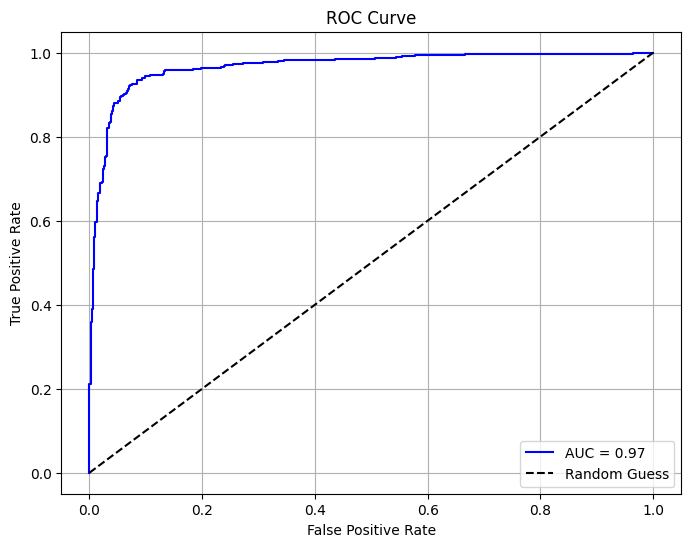

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Extracting predicted probabilities for the positive class (assuming 'predictions' contains them)
y_proba = predictions.predictions[:, 1]

# Computing FPR (False Positive Rate), TPR (True Positive Rate), and AUC
fpr, tpr, _ = roc_curve(preprocessed_reviews['Label'], y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



### Roberta Model

In [ ]:
from transformers import RobertaTokenizer

# Loading the RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def encode_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),               # The texts to tokenize
        padding=True,              # Adding the padding to make all tokenized sequences equal in length
        truncation=True,           # Truncating sequences longer than max_length
        max_length=max_length,     # Maximum length of the tokenized sequences
        return_tensors="pt"        # PyTorch tensors
    )

# Tokenize the training and validation data
train_encodings = encode_data(train_texts, tokenizer)
val_encodings = encode_data(val_texts, tokenizer)


In [ ]:
import torch

# Define the dataset class for RoBERTa
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item

# Creating training and validation datasets
train_dataset = ReviewsDataset(train_encodings, train_labels)
val_dataset = ReviewsDataset(val_encodings, val_labels)


In [ ]:
from transformers import RobertaForSequenceClassification

# Loading the RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)  # Binary classification (positive/negative sentiment)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer, TrainingArguments
import os

os.environ["WANDB_DISABLED"] = "true"

# Defining training arguments
training_args = TrainingArguments(
    output_dir='./results',
    run_name="roberta_sentiment_analysis",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    save_total_limit=2
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Defining the Trainer
trainer = Trainer(
    model=model,                          # Pretrained RoBERTa model
    args=training_args,                   # Training arguments
    train_dataset=train_dataset,          # Training dataset
    eval_dataset=val_dataset              # Validation dataset
)

# Train the model
trainer.train()


<ipython-input-79-c55316178e79>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss
1,0.693000,0.692329
2,0.663900,0.418083
3,0.360400,0.307612


<ipython-input-79-c55316178e79>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-79-c55316178e79>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-79-c55316178e79>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


TrainOutput(global_step=150, training_loss=0.5724568684895833, metrics={'train_runtime': 54.5492, 'train_samples_per_second': 43.997, 'train_steps_per_second': 2.75, 'total_flos': 28366660656000.0, 'train_loss': 0.5724568684895833, 'epoch': 3.0})

In [ ]:
# Tokenizing the test data
test_encodings = encode_data(preprocessed_reviews['Product_Review'], tokenizer)
test_dataset = ReviewsDataset(test_encodings, preprocessed_reviews['Label'])

# Making predictions on the test dataset
predictions = trainer.predict(test_dataset)


<ipython-input-79-c55316178e79>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Converting logits to predicted labels
preds = np.argmax(predictions.predictions, axis=1)

# Printing classification report and confusion matrix
print("Confusion Matrix:\n", confusion_matrix(preprocessed_reviews['Label'], preds), '\n')
print("Classification Report:\n", classification_report(preprocessed_reviews['Label'], preds))


Confusion Matrix:
 [[465  35]
 [ 30 470]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       500
           1       0.93      0.94      0.94       500

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.93      1000
weighted avg       0.94      0.94      0.93      1000



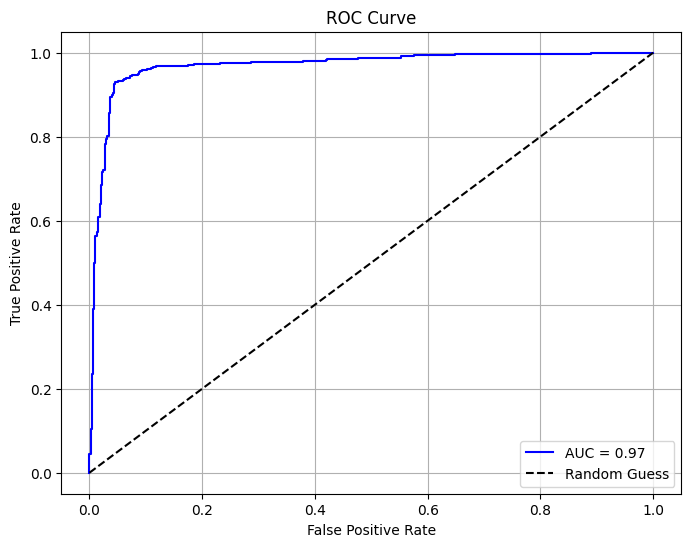

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Extracting predicted probabilities for the positive class (assuming 'predictions' contains them)
y_proba = predictions.predictions[:, 1]

# Computing FPR (False Positive Rate), TPR (True Positive Rate), and AUC
fpr, tpr, _ = roc_curve(preprocessed_reviews['Label'], y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Comparision of BERT and RoBERTa models with the models in Task 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


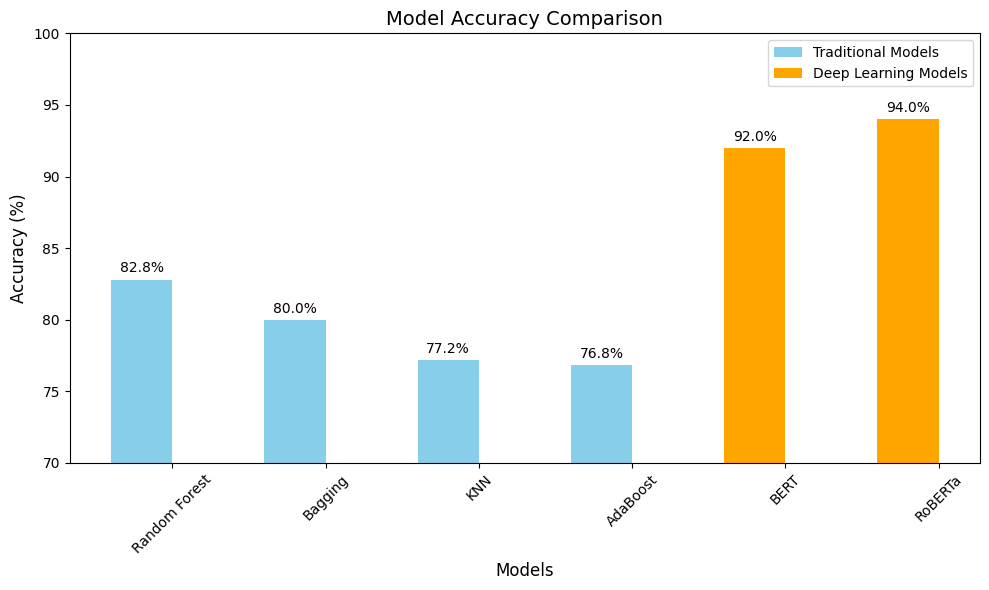

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


models = ['Random Forest', 'Bagging', 'KNN', 'AdaBoost']
dl_models = ['BERT', 'RoBERTa']
traditional_accuracies = [82.8, 80.0, 77.2, 76.8]
dl_accuracies = [92.0, 94.0]


all_models = models + dl_models


x = np.arange(len(models))  # Positions for traditional models
x_dl = np.arange(len(dl_models)) + len(models)  # Positions for DL models

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4

# Plotting traditional models
plt.bar(x - bar_width / 2, traditional_accuracies, bar_width, label='Traditional Models', color='skyblue')

# Plotting DL models
plt.bar(x_dl - bar_width / 2, dl_accuracies, bar_width, label='Deep Learning Models', color='orange')

# Adding title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Adding the accuracy scores on top of the bars
for i, accuracy in enumerate(traditional_accuracies):
    plt.text(x[i] - bar_width / 2, accuracy + 0.5, f'{accuracy}%', ha='center', fontsize=10)

for i, accuracy in enumerate(dl_accuracies):
    plt.text(x_dl[i] - bar_width / 2, accuracy + 0.5, f'{accuracy}%', ha='center', fontsize=10)

# Setting y-axis range for better comparison
plt.ylim(70, 100)

# Adjusting x-ticks and labels
xticks_positions = np.concatenate([x, x_dl])
xticks_labels = models + dl_models
plt.xticks(xticks_positions, xticks_labels, rotation=45, fontsize=10)

# Adding legend
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


### Task 4 (Topic Detection)

### Topic Detection using LDA

In [ ]:
preprocessed_reviews.head()

,Product_Review,Label
0,so way plug we unless I go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor problem,0
4,the mic great,1


In [ ]:
import nltk

# Downloading the required resource for tokenization
nltk.download('punkt_tab')

# Applying tokenization to the 'Product_Review' column
preprocessed_reviews['Product_Review'] = preprocessed_reviews['Product_Review'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# 'Product_Review' contains the tokenized reviews as lists of words
words = preprocessed_reviews['Product_Review'].tolist()


In [ ]:
words

[['so', 'way', 'plug', 'we', 'unless', 'I', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tie', 'charger', 'conversation', 'last', 'minutesmajor', 'problem'],
 ['the', 'mic', 'great'],
 ['I', 'jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'],
 ['if',
  'several',
  'dozen',
  'several',
  'hundred',
  'contact',
  'imagine',
  'fun',
  'send',
  'one',
  'one'],
 ['if', 'razor', 'owneryou', 'must'],
 ['needless', 'say', 'I', 'waste', 'money'],
 ['what', 'waste', 'money', 'time'],
 ['and', 'sound', 'quality', 'great'],
 ['he', 'impress', 'go', 'original', 'battery', 'extend', 'battery'],
 ['if',
  'two',
  'separate',
  'mere',
  'it',
  'I',
  'start',
  'notice',
  'excessive',
  'static',
  'garbled',
  'sound',
  'headset'],
 ['very', 'good', 'quality', 'though'],
 ['the', 'design', 'odd', 'ear', 'clip', 'comfortable'],
 ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'],
 ['I', 'advise', 'everyone', 'do', 'not', 'be'

In [ ]:
# 'Product_Review' contains the tokenized reviews as lists of words
words = preprocessed_reviews['Product_Review'].tolist()

# Defining a list of stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords from the tokenized words and update the words variable
words = [[word for word in review if word not in stop_words] for review in words]

In [ ]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
from gensim import corpora
import gensim
from gensim.utils import simple_preprocess

# Creating Dictionary
id2word = corpora.Dictionary(words)

# Filtering out rare and extremely common words (optional)
id2word.filter_extremes(no_below=5, no_above=0.5)

# Creating the corpus (BoW representation)
corpus = [id2word.doc2bow(text) for text in words]

# Checking the first document in the corpus
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
from gensim.models import LdaModel

# Training the LDA model (example: 10 topics)
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    random_state=42,
    passes=10,
    iterations=50
)

# Printing topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}:\n{topic}\n")


Topic 0:
0.067*"work" + 0.054*"phone" + 0.054*"I" + 0.054*"one" + 0.049*"case" + 0.043*"product" + 0.042*"like" + 0.039*"cheap" + 0.036*"lot" + 0.027*"feel"

Topic 1:
0.228*"I" + 0.076*"get" + 0.049*"phone" + 0.041*"could" + 0.039*"happy" + 0.037*"love" + 0.025*"reception" + 0.022*"product" + 0.021*"want" + 0.020*"purchase"

Topic 2:
0.157*"battery" + 0.069*"easy" + 0.049*"time" + 0.041*"life" + 0.039*"make" + 0.039*"use" + 0.039*"long" + 0.034*"go" + 0.031*"last" + 0.022*"pair"

Topic 3:
0.098*"good" + 0.072*"quality" + 0.070*"ear" + 0.068*"sound" + 0.039*"fit" + 0.036*"poor" + 0.035*"price" + 0.033*"case" + 0.029*"volume" + 0.028*"say"

Topic 4:
0.131*"I" + 0.069*"recommend" + 0.063*"excellent" + 0.061*"would" + 0.058*"money" + 0.053*"waste" + 0.036*"headset" + 0.032*"return" + 0.029*"phone" + 0.027*"product"

Topic 5:
0.074*"I" + 0.071*"buy" + 0.070*"phone" + 0.038*"headset" + 0.038*"bluetooth" + 0.034*"like" + 0.025*"car" + 0.021*"motorola" + 0.020*"charger" + 0.020*"new"

Topic 6:

In [ ]:
pip install pyldavis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.9 MB/s eta 0:00:00


In [ ]:

import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()


LDAvis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)


LDAvis_data


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.055738 -0.073202       1        1  15.239975
5      0.005323 -0.037502       2        1  11.086716
1      0.149412 -0.030427       3        1  10.940639
7      0.031564 -0.053255       4        1  10.918267
3     -0.127514 -0.229648       5        1  10.464100
6      0.037504  0.204857       6        1   9.470635
4      0.185758 -0.035400       7        1   8.195256
8     -0.199130  0.019655       8        1   8.111369
0      0.080165  0.118520       9        1   8.048581
2     -0.218819  0.116402      10        1   7.524462, topic_info=          Term        Freq       Total Category  logprob  loglift
8        great   90.000000   90.000000  Default  30.0000  30.0000
0            I  335.000000  335.000000  Default  29.0000  29.0000
27     battery   47.000000   47.000000  Default  28.0000  28.0000
41        work  102.000000  102.000000  Default  27.0000  27.0000
6         good   91.000000   91.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
52         use   10.922706   66.835042  Topic10  -3.2423   0.7756
5    excellent    4.097680   28.170737  Topic10  -4.2227   0.6591
95        call    3.634690   23.375131  Topic10  -4.3426   0.7259
38       phone    5.801667  164.040005  Topic10  -3.8750  -0.7550
143       also    2.697057   21.791099  Topic10  -4.6410   0.4977

[424 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.277026      I
0         2  0.092342      I
0         3  0.277026      I
0         4  0.148939      I
0         5  0.005958      I
...     ...       ...    ...
45        7  0.512623  would
45        9  0.113916  would
75        1  0.314133   year
75        4  0.125653   year
75        8  0.502613   year

[715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 2, 8, 4, 7, 5, 9, 1, 3])

### Topic Detection using Non-Negative Matrix Factorization


In [ ]:
words = preprocessed_reviews['Product_Review'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Defining a list of stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords from the tokenized words and update the words variable
words = [[word for word in review if word not in stop_words] for review in words]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TF-IDF Representation

In [ ]:
# Flattening the tokenized words into a single list for creating a vectorized representation
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting tokenized reviews into string format (required for TF-IDF vectorizer)
reviews_string = [' '.join(review) for review in words]

# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

# Transforming the reviews into TF-IDF representation
tfidf = tfidf_vectorizer.fit_transform(reviews_string)

# Checking the TF-IDF shape
print(f"TF-IDF matrix shape: {tfidf.shape}")

TF-IDF matrix shape: (1000, 192)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training and Fitting the model (NMF)

In [ ]:
# Importing NMF
from sklearn.decomposition import NMF

# Training the NMF model
nmf_model = NMF(n_components=10, random_state=42, max_iter=200)

# Fitting the model to the TF-IDF matrix
W = nmf_model.fit_transform(tfidf)
H = nmf_model.components_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extracting the feature names (terms) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Printing the topics with their top terms
for topic_idx, topic in enumerate(H):
    print(f"Topic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

Topic 0:
phone, bad, new, like, cell, say, drop, make, love, problem

Topic 1:
work, fine, plug, charger, item, like, charm, perfectly, purchase, new

Topic 2:
good, price, far, really, case, value, make, look, quality, audio

Topic 3:
great, price, item, device, reception, service, battery, year, little, problem

Topic 4:
product, recommend, price, excellent, happy, highly, really, order, company, high

Topic 5:
use, easy, case, make, small, like, ear, break, day, design

Topic 6:
quality, sound, poor, low, service, clear, nice, bad, end, cheap

Topic 7:
buy, battery, life, charge, make, long, problem, purchase, year, time

Topic 8:
waste, money, time, problem, say, want, terrible, right, item, earpiece

Topic 9:
headset, love, bluetooth, excellent, ear, comfortable, fit, reception, time, start



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualising the Topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


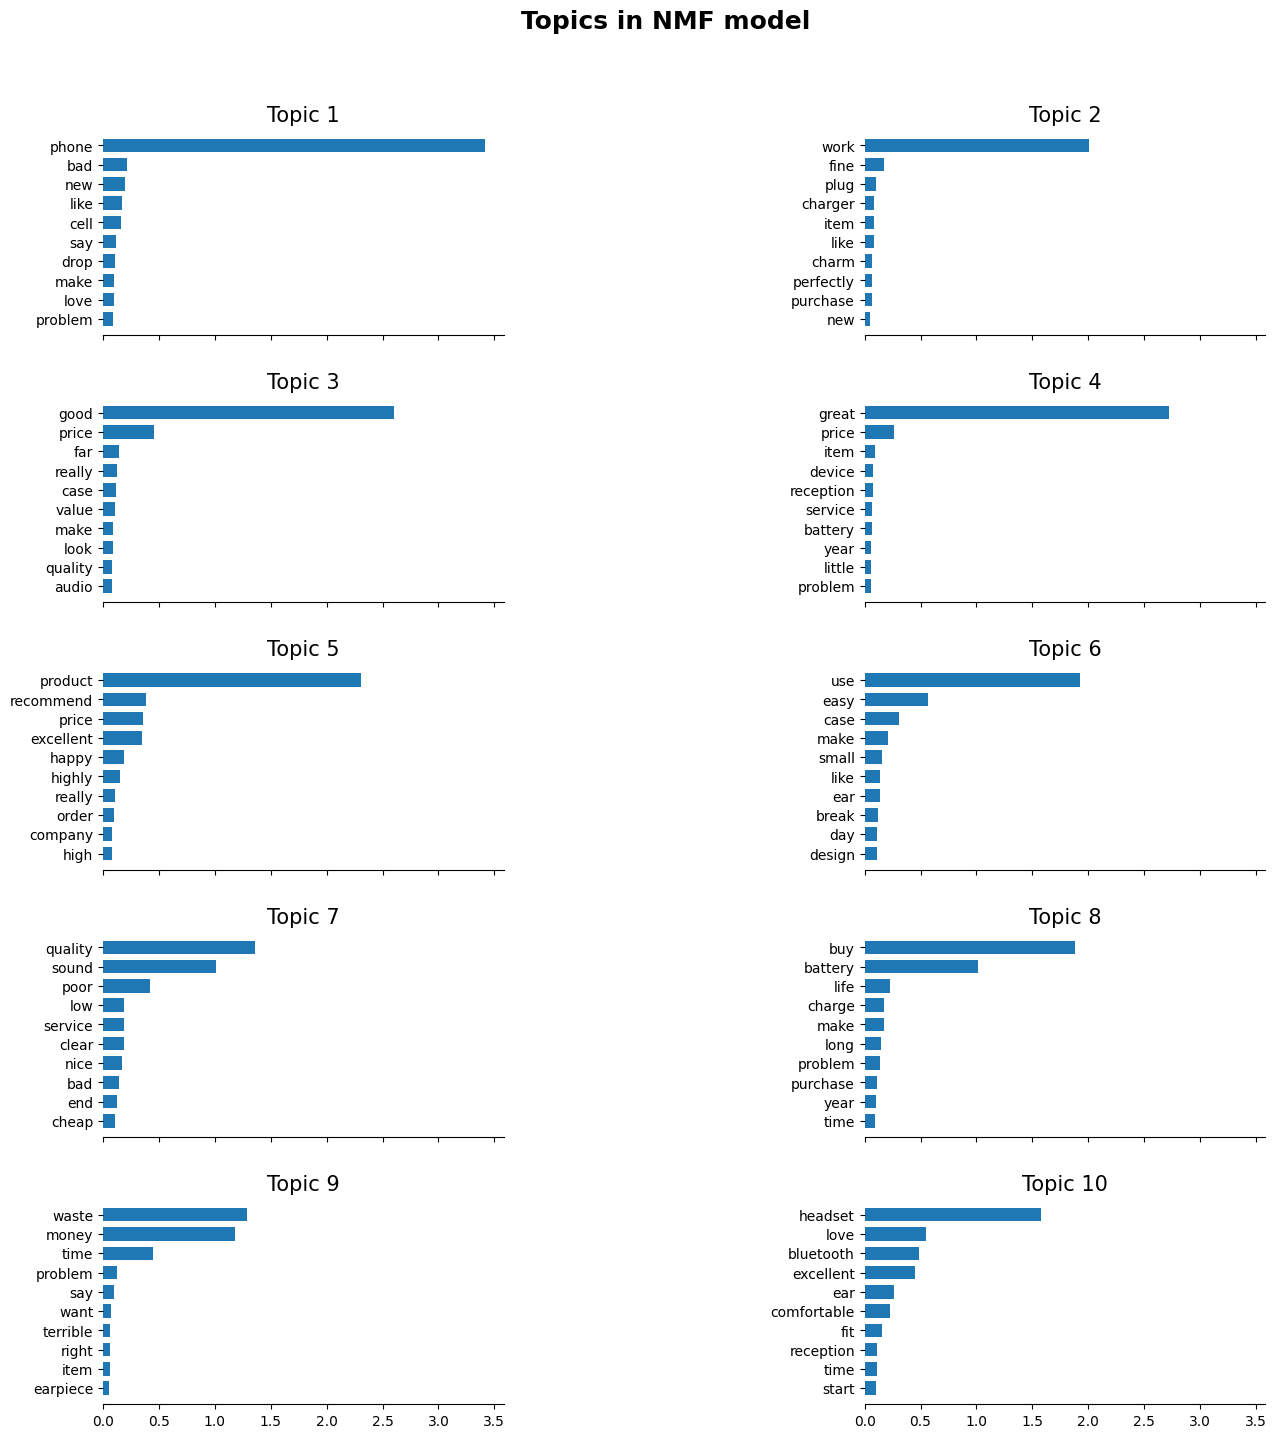

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a bar chart for the top terms in each topic
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 2, figsize=(15, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}',
                     fontdict={'fontsize': 15})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.suptitle(title, fontsize=18, weight='bold')
    plt.show()

# Plotting the top words for each topic
plot_top_words(nmf_model, feature_names, 10, "Topics in NMF model")